# Stochastic bandits - naive example

This notebook shows a simple example of Stochastic Multi-Armed Bandit with four *Bernulli* arms and policy with uniform exploration.

## Four Bernulli arms:
 - Bernoulli($p=0.2$, $a=0.1$, $b=1.1$, $\mu=0.3$) 
 - Bernoulli($p=0.2$, $a=0.5$, $b=1.5$, $\mu=0.7$)
 - Bernoulli($p=0.5$, $a=0$, $b=1$, $\mu=0.5$)
 - Bernoulli($p=0.7$, $a=-0.2$, $b=1.8$, $\mu=1.2$)
 
## Uniform exploration policy:
 - Max. number of rounds $t_{max}=1000$ (*time horizon*)
 - Exploration phase, number of arm pulls in exploration, $N=t_{max}^{2/3}(log(t_{max})^{1/3})$ [1]  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bandito import Bandito
from bandito.arms import Bernoulli
from bandito.policies import Uniform
import warnings
warnings.filterwarnings('ignore')

In [2]:
t_max = 1000
q = t_max ** (2 / 3) * (4 * np.log(t_max)) ** (1 / 3) / (t_max * 4)
policy = Uniform(q=q, t_max=t_max)
arms = [
    Bernoulli(p=0.2, a=0.1, b=1.1, t_max=t_max),
    Bernoulli(p=0.2, a=0.5, b=1.5, t_max=t_max),
    Bernoulli(p=0.5, a=0, b=1, t_max=t_max),
    Bernoulli(p=0.7, a=-0.2, b=1.8, t_max=t_max)
]
b = Bandito(policy, arms, t_max)

[]

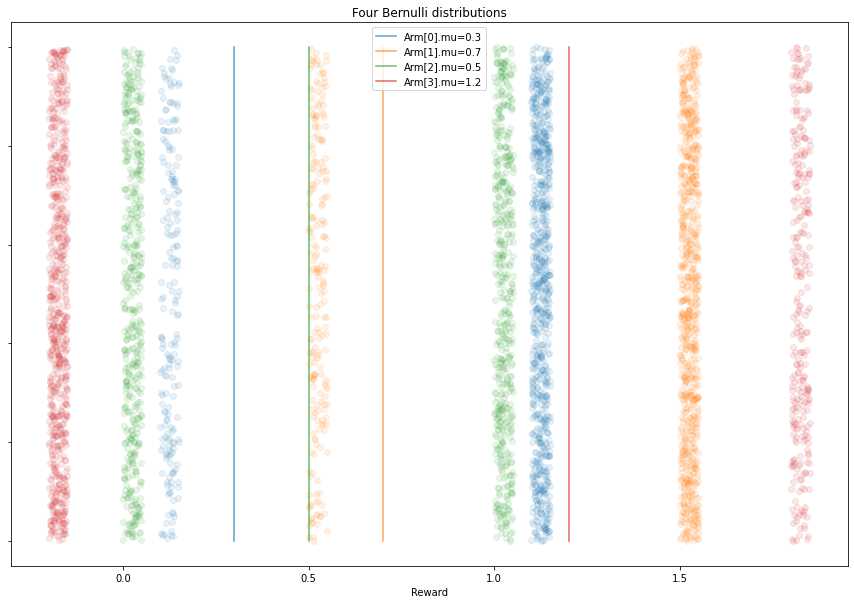

In [3]:
plt.figure(figsize=(15, 10))
plt.title("Four Bernulli distributions")
plt.xlabel("Reward")
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, a in enumerate(arms):
    plt.scatter(
        a.x_temp + np.random.uniform(high=0.05, size=t_max), 
        np.random.uniform(high=1, size=t_max), 
        alpha=0.1,
        color=colors[i]
    )
    plt.plot([a.mu] * 2, [0, 1], color=colors[i], alpha=0.7, label=f"Arm[{i}].mu={round(a.mu, 4)}")
plt.legend(loc='upper center')
f = plt.gca()
f.axes.yaxis.set_ticklabels([])
plt.plot()

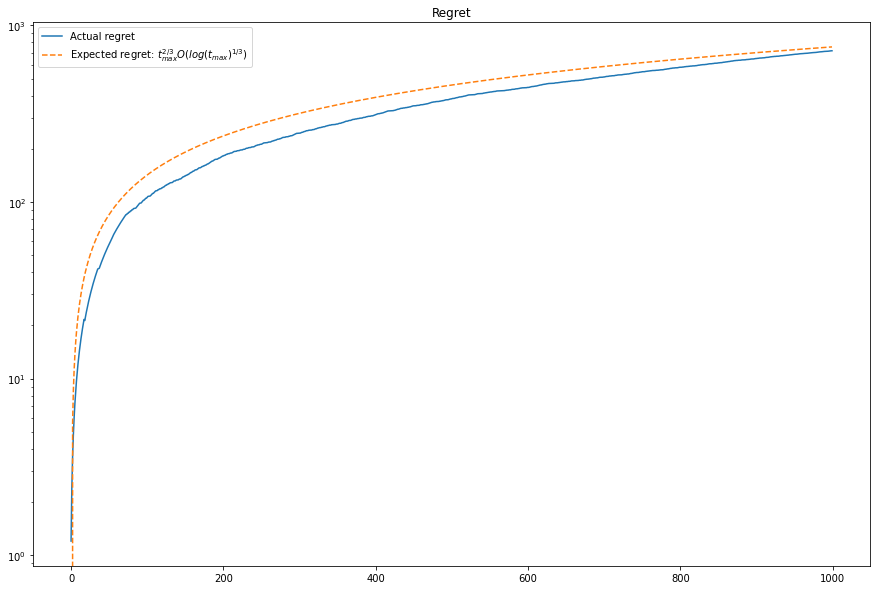

In [6]:
bandito_run = b()
best_arm = 3
regret = arms[best_arm].mu * t_max - sum(bandito_run['reward'])
t = np.arange(t_max)

plt.figure(figsize=(15, 10))
plt.yscale("log")
plt.title(f"Regret")
plt.plot(np.cumsum(arms[best_arm].mu - bandito_run['reward']), label=r"Actual regret")
plt.plot(
    t, 
    2.5 * t ** (2 / 3) * (len(arms) * np.log(t)) ** (1 / 3), 
    "--", 
    label=r"Expected regret: $t_{max}^{2/3}O(log(t_{max})^{1/3})$"
)
plt.legend()
plt.show()

## References
[1] Slivkins A. (2019), *Introduction to Multi-Armed Bandits*, arXiv:1904.07272, https://arxiv.org/abs/1904.07272